<a href="https://colab.research.google.com/github/marina554/sub-Repository/blob/main/%E4%BD%93%E8%AA%BF%E7%AE%A1%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

今日の体調は何点ですか？（0～100点で入力してください）：90
いいですね！その調子です！
2025-11-08 のScore（90点）を記録しました。


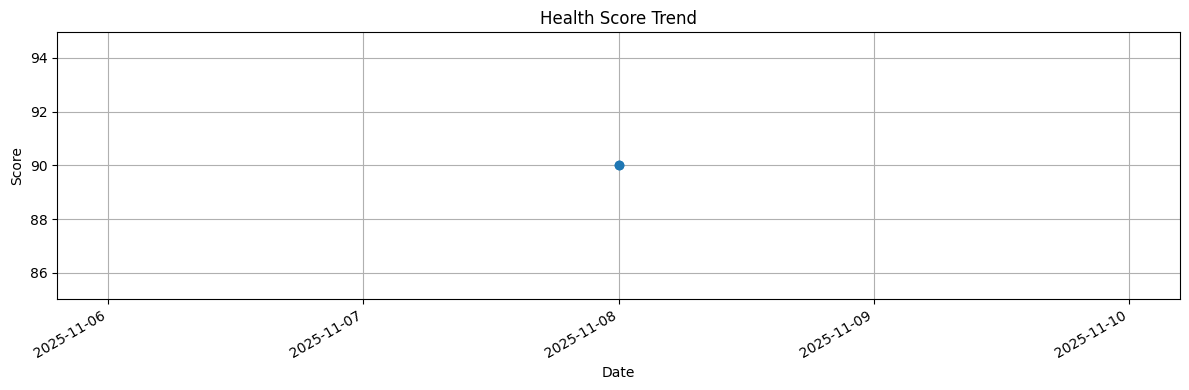

In [5]:
import csv
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


class HealthLogger:
    def __init__(self, filename="health_log.csv"):
        self.filename = filename

    def get_score(self):
        score_input = input("今日の気分は何点ですか？（0～100点で入力してください）：")
        try:
            score = int(score_input)
            if not (0 <= score <= 100):
                raise ValueError("0～100の範囲で入力してください。")
            return score
        except ValueError as e:
            print(e)
            return None

    def show_message(self, score):
        if score <= 50:
            print("今日は無理をしないでください。")
        elif score <= 70:
            print("普段どおりいきましょう。")
        else:
            print("いいですね！その調子です！")

    def save_to_csv(self, score):
        date = datetime.date.today()
        file_exists = os.path.exists(self.filename)
        with open(self.filename, "a", newline="", encoding="utf-8") as f:
            writer = csv.writer(f)
            if not file_exists:
                writer.writerow(["Date", "Score"])
            writer.writerow([date, score])
        print(f"{date} のScore（{score}点）を記録しました。")


class HealthVisualizer:
    def __init__(self, filename="health_log.csv"):
        self.filename = filename

    def plot(self):
        if not os.path.exists(self.filename):
            print("まだ記録がありません。")
            return

        df = pd.read_csv(self.filename)
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.sort_values("Date")

        plt.figure(figsize=(12, 4))
        plt.plot(df["Date"], df["Score"], marker="o", linestyle="-")
        plt.title("Health Score Trend")
        plt.xlabel("Date")
        plt.ylabel("Score")
        plt.grid(True)

        # 日付を毎日表示
        plt.gca().xaxis.set_major_locator(mdates.DayLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
        plt.gcf().autofmt_xdate()  # 日付ラベルを傾けて見やすくする

        plt.tight_layout()
        plt.show()


class HealthApp:
    def __init__(self):
        self.logger = HealthLogger()
        self.visualizer = HealthVisualizer()

    def run(self):
        score = self.logger.get_score()
        if score is None:
            return
        self.logger.show_message(score)
        self.logger.save_to_csv(score)
        self.visualizer.plot()


if __name__ == "__main__":
    app = HealthApp()
    app.run()


In [ ]:
# =========================
# 1. ライブラリのインポート
# =========================
import csv
import datetime
import os

# =========================
# 2. HealthLogger クラス（基本部分）
# =========================
class HealthLogger:
    def __init__(self, csv_filename="health_log.csv"):
        self.csv_filename = csv_filename

    # -------------------------
    # スコアを取得（0～100）
    # -------------------------
    def get_score(self):
        score_input = input("今日の気分は何点ですか？（0～100）：")
        try:
            score = int(score_input)
            if not (0 <= score <= 100):
                raise ValueError("0～100の範囲で入力してください。")
            return score
        except ValueError as e:
            print(f"入力エラー: {e}")
            return None

    # -------------------------
    # メッセージ表示
    # -------------------------
    def show_message(self, score):
        if score <= 50:
            print("今日は無理をしないでください。")
        elif score <= 70:
            print("普段どおりいきましょう。")
        else:
            print("いいですね！その調子です！")

    # -------------------------
    # CSVに保存
    # -------------------------
    def save_score(self, score):
        date = datetime.date.today()
        file_exists = os.path.exists(self.csv_filename)

        with open(self.csv_filename, "a", newline="", encoding="utf-8") as f:
            writer = csv.writer(f)
            if not file_exists:
                writer.writerow(["Date", "Score"])  # ヘッダー
            writer.writerow([date, score])
        print(f"{date} Health score ({score}) saved to CSV.")

# =========================
# 3. HealthApp クラス
# =========================
class HealthApp:
    def __init__(self):
        self.logger = HealthLogger()

    def run(self):
        # 1. スコアを取得
        score = self.logger.get_score()
        if score is None:
            return

        # 2. メッセージを表示
        self.logger.show_message(score)

        # 3. CSVに保存
        self.logger.save_score(score)

# =========================
# 4. プログラム実行
# =========================
if __name__ == "__main__":
    app = HealthApp()
    app.run()


In [ ]:
#Excel保存追加
# =========================
# 1. ライブラリのインポート
# =========================
import csv
import datetime
import os
import pandas as pd  # 追加：Excel操作用

# =========================
# 2. HealthLogger クラス（Excel保存追加）
# =========================
class HealthLogger:
    def __init__(self, csv_filename="health_log.csv", excel_filename="health_log.xlsx"):
        self.csv_filename = csv_filename
        self.excel_filename = excel_filename

    # -------------------------
    # スコアを取得（0～100）
    # -------------------------
    def get_score(self):
        score_input = input("今日の気分は何点ですか？（0～100）：")
        try:
            score = int(score_input)
            if not (0 <= score <= 100):
                raise ValueError("0～100の範囲で入力してください。")
            return score
        except ValueError as e:
            print(f"入力エラー: {e}")
            return None

    # -------------------------
    # メッセージ表示
    # -------------------------
    def show_message(self, score):
        if score <= 50:
            print("今日は無理をしないでください。")
        elif score <= 70:
            print("普段どおりいきましょう。")
        else:
            print("いいですね！その調子です！")

    # -------------------------
    # CSVとExcelに保存
    # -------------------------
    def save_score(self, score):
        date = datetime.date.today()
        file_exists = os.path.exists(self.csv_filename)

        # --- CSV保存 ---
        with open(self.csv_filename, "a", newline="", encoding="utf-8") as f:
            writer = csv.writer(f)
            if not file_exists:
                writer.writerow(["Date", "Score"])
            writer.writerow([date, score])
        print(f"{date} Health score ({score}) saved to CSV.")

        # --- Excel保存 ---
        if os.path.exists(self.excel_filename):
            # 既存Excelを読み込む
            df = pd.read_excel(self.excel_filename)
            new_df = pd.DataFrame({"Date": [date], "Score": [score]})
            df = pd.concat([df, new_df], ignore_index=True)
        else:
            # Excelがなければ新規作成
            df = pd.DataFrame({"Date": [date], "Score": [score]})

        # Excelに書き込む
        df.to_excel(self.excel_filename, index=False)
        print(f"{date} Health score ({score}) saved to Excel.")

# =========================
# 3. HealthApp クラス
# =========================
class HealthApp:
    def __init__(self):
        self.logger = HealthLogger()

    def run(self):
        # 1. スコアを取得
        score = self.logger.get_score()
        if score is None:
            return

        # 2. メッセージを表示
        self.logger.show_message(score)

        # 3. CSVとExcelに保存
        self.logger.save_score(score)

# =========================
# 4. プログラム実行
# =========================
if __name__ == "__main__":
    app = HealthApp()
    app.run()
